# 0. Import Library

In [20]:
import tensorflow as tf
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from plot_results import *
from build_models import *

# 1. Data

## 1-1 Load data that already splited and preprocessed

In [37]:
#x_data = np.load('data/celeba_split/celeba_140000.npy')
x_data = np.load('x_2000.npy')
y_data = np.load('y_2000.npy', allow_pickle=True)
x_data = x_data/255
print('* data shape: ', x_data.shape, y_data.shape)

* data shape:  (2000, 64, 64, 3) (2000, 41)


# 2. Load Model 

## 2-1. Get VAE model structure from build_vae.py

In [3]:
encoder, decoder, vae = build_vae(x_data, 100)
#encoder.summary()
#decoder.summary()
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 277160    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         251843    
Total params: 529,003
Trainable params: 529,003
Non-trainable params: 0
_________________________________________________________________


## 2-2. Get Weight from training result's Checkpoint

In [4]:
save_dir = 'results_VAE/train_10'
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=encoder, decoder=decoder, vae=vae)
checkpoint.restore(tf.train.latest_checkpoint(save_dir))

# 3. Plot Resulsts

## 3-1. Plot VAE reconstruct Images

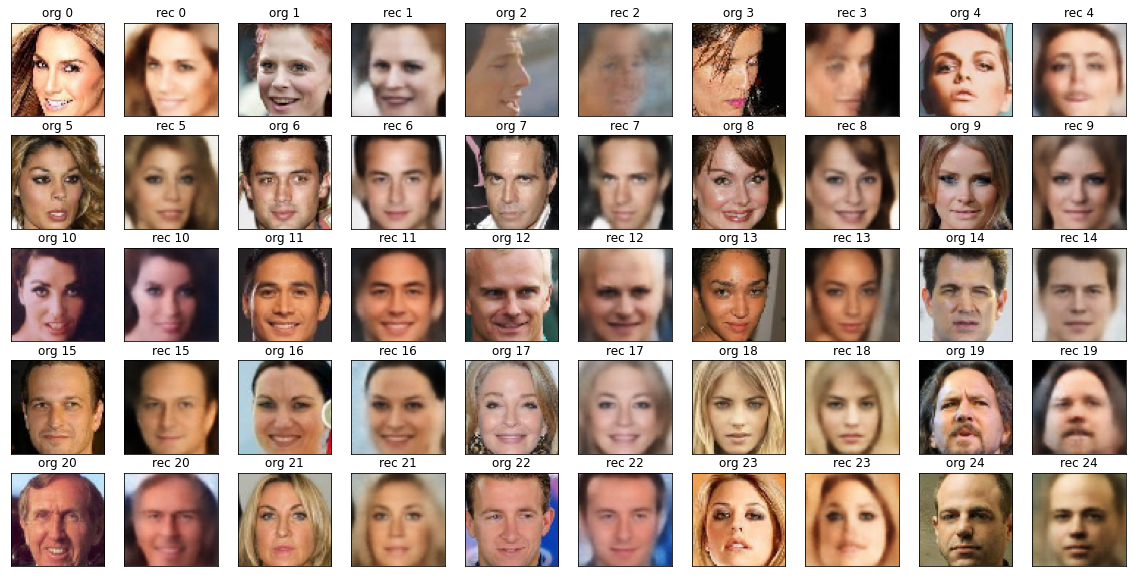

In [13]:
plot_recimg(vae, x_data, 5)

* original z space:  -4.1755


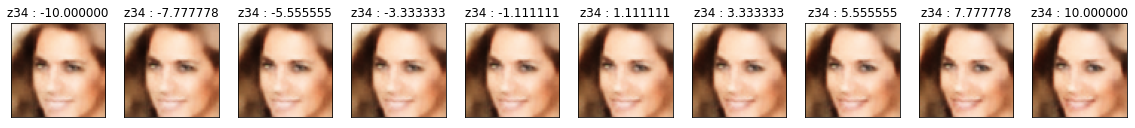

In [18]:
plot_gridimg(encoder, decoder, x_data, 0, 34, -10, 10)

In [50]:
z_pred = encoder.predict(x_data)[2]
y_pred = vae.predict(x_data)
z_pred.shape, y_pred.shape

((2000, 100), (2000, 64, 64, 3))

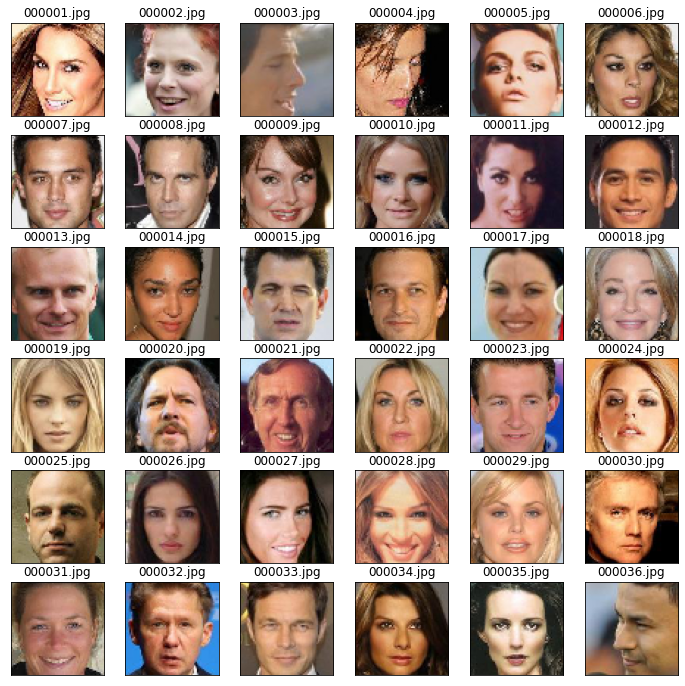

In [68]:
size = 6
fig = plt.figure(figsize=(size*2,size*2))
for i in range(size*size):
    plt.subplot(size,size,i+1)
    plt.imshow(x_data[i].reshape(x_data.shape[1:]))
    plt.xticks([])
    plt.yticks([])
    plt.title(y_data[i][0])
    #plt.subplot(size,size,i+1)
    #plt.imshow(x_data[i].reshape(x_data.shape[1:]))
plt.show()
plt.close('all')

In [ ]:
=